In [30]:
from math import floor
import datetime as datetime
import quandl as ql
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import smabt
import mom


from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [2]:
ds_currency = xr.open_zarr('currency_pairs')
df_currency = ds_currency.to_dataframe().unstack(level=1)
df_currency.columns = df_currency.columns.droplevel(0)
df_currency = df_currency.rename_axis(None, axis=1)
df_currency.tail()

,aus_usd,cad_usd,eur_usd,jpy_usd,usd_gbp
Date,,,,,
2019-01-07,0.7143,1.3297,1.1468,108.62,1.2757
2019-01-08,0.7134,1.3307,1.1444,108.57,1.2724
2019-01-09,0.7172,1.3212,1.1524,108.38,1.2764
2019-01-10,0.7190,1.3232,1.1517,108.29,1.2768
2019-01-11,0.7204,1.3256,1.1479,108.34,1.2836


#### Momentum
+ The momentum strategy buys strength and sells weakness
+ If something has recently performed well we buy
+ If something has recently performed poorly, we sell 
+ The definition of recently is for the analyst to determine

In [3]:
#20-day rolling mean on returns
aus_usd = df_currency['aus_usd']
aus_usd_mom = pd.DataFrame()
aus_usd_mom['returns'] = np.log(aus_usd/aus_usd.shift(1))
aus_usd_mom['position'] = np.sign(aus_usd_mom['returns'].rolling(20).mean())
aus_usd_mom['strategy'] = aus_usd_mom['returns'] * aus_usd_mom['position'].shift(1)

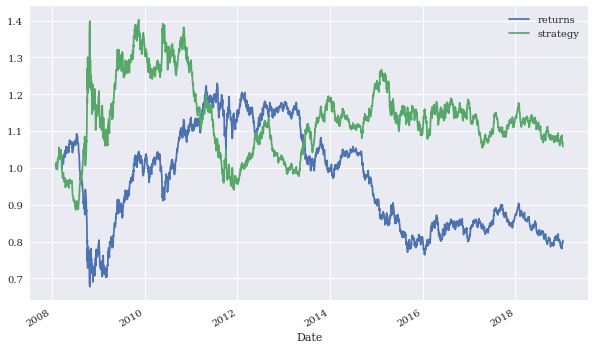

In [4]:
aus_usd_mom[['returns', 'strategy']].dropna().cumsum(
                     ).apply(np.exp).plot(figsize=(10, 6));

#### Momentum for various windows 

#### JPY/USD
+ This is not a good instrument for short or long-term moment momentum trades.
+ In the shorter time-windows our strategy is inversely correlated with returns
+ As the momentum window lengthens, the strategies become positively correlated which is concerning


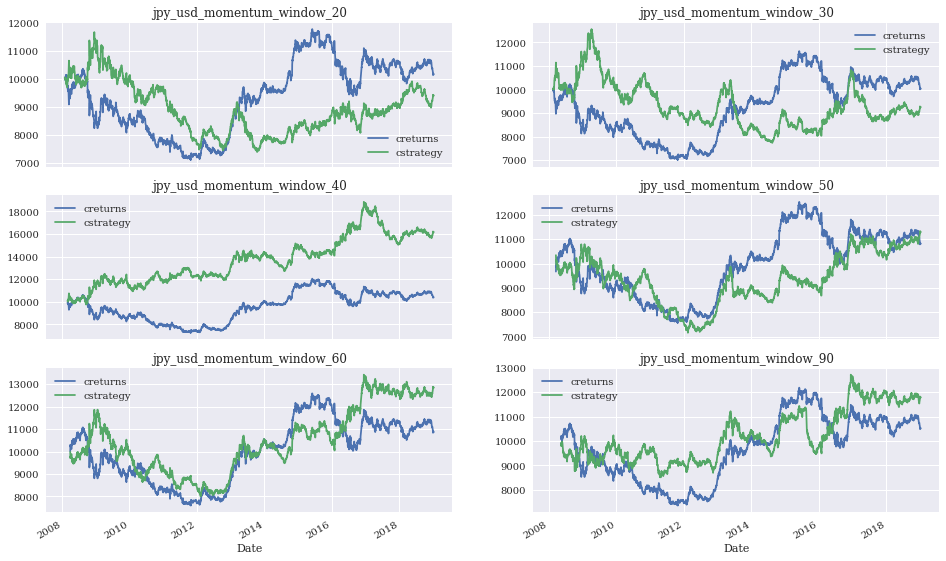

In [26]:
jpy_usd_mom = mom.MomVectorBacktester(df_currency, 'jpy_usd', '2008-01-02', '2019-01-11', 10000, 0.001)
fig, ax = plt.subplots(3,2, figsize=(16,10), sharex=True)

for i, period in enumerate([20,30,40,50, 60, 90]):
    jpy_usd_mom.run_strategy(momentum=period)
    jpy_usd_mom.plot_results(ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title('{}_momentum_window_{}'.format(jpy_usd_mom.instrument, period))

#### CAD/USD
+ This is a dangerously terrible candidate for momentum strategies 

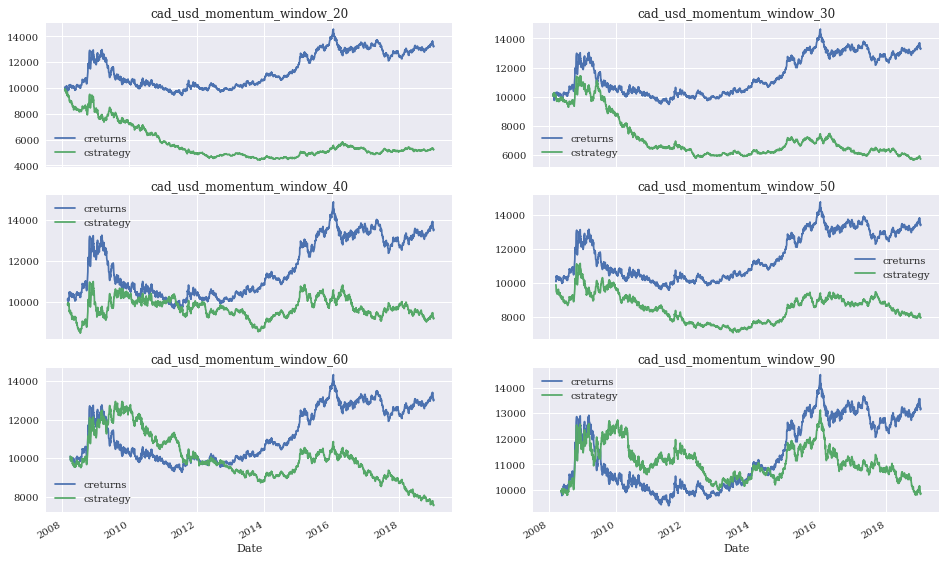

In [25]:
cad_usd_mom = mom.MomVectorBacktester(df_currency, 'cad_usd', '2008-01-02', '2019-01-11', 10000, 0.001)
fig, ax = plt.subplots(3,2, figsize=(16,10), sharex=True)

for i, period in enumerate([20,30,40,50, 60, 90]):
    cad_usd_mom.run_strategy(momentum=period)
    cad_usd_mom.plot_results(ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title('{}_momentum_window_{}'.format(cad_usd_mom.instrument, period))

#### EUR/USD
+ This currency pair is actually a candidate for relatively short-term momentum trading 
+ The period windows between 30-40 days seems to be the sweet spot on this

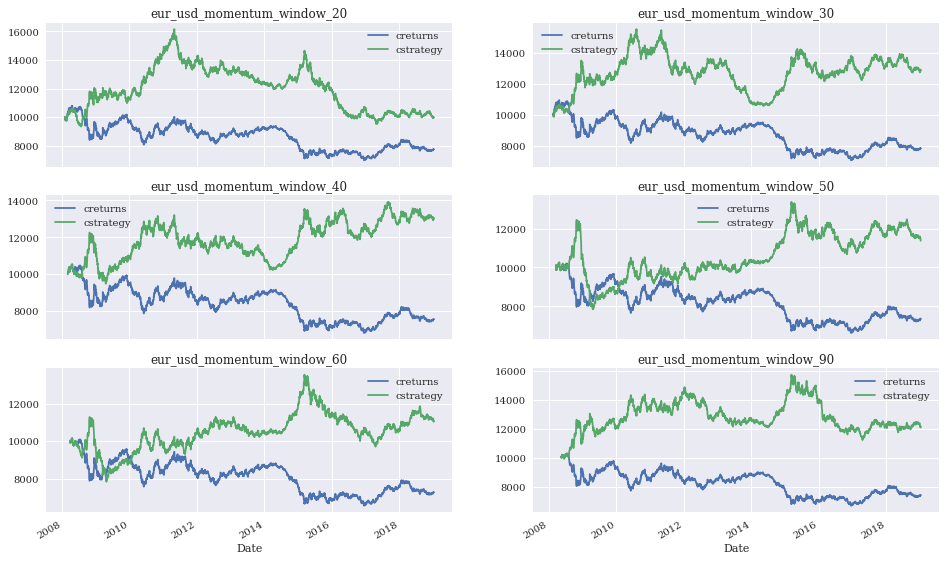

In [23]:
eur_usd_mom = mom.MomVectorBacktester(df_currency, 'eur_usd', '2008-01-02', '2019-01-11', 10000, 0.001)
fig, ax = plt.subplots(3,2, figsize=(16,10), sharex=True)

for i, period in enumerate([20,30,40,50, 60, 90]):
    eur_usd_mom.run_strategy(momentum=period)
    eur_usd_mom.plot_results(ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title('{}_momentum_window_{}'.format(eur_usd_mom.instrument, period))

### USD/GBP
+ This instrument does not look like a good candidate for short-term momentum trading
+ windows above 60 days have positive returns when considering trading costs

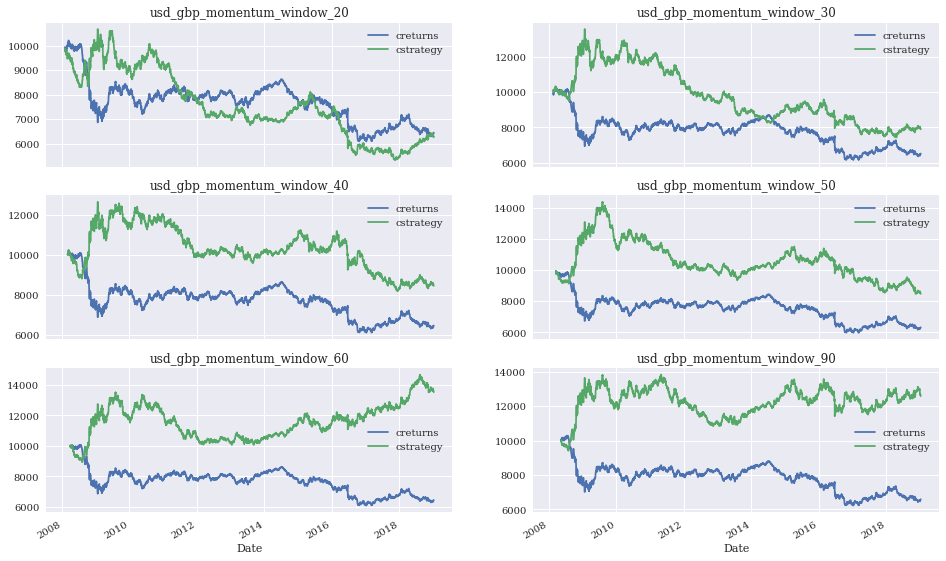

In [19]:
usd_gbp_mom = mom.MomVectorBacktester(df_currency, 'usd_gbp', '2008-01-02', '2019-01-11', 10000, 0.001)
fig, ax = plt.subplots(3,2, figsize=(16,10), sharex=True)

for i, period in enumerate([20,30,40,50, 60, 90]):
    usd_gbp_mom.run_strategy(momentum=period)
    usd_gbp_mom.plot_results(ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title('{}_momentum_window_{}'.format(usd_gbp_mom.instrument, period))

# AUS/USD
+ Short-term momentum trading does not look like a good fit for this currency pair
+ Momentum windows greater than 20 look like they can work. 
+ If we consider trading costs, we

In [29]:
aus_usd_mom = mom.MomVectorBacktester(df_currency, 'aus_usd', '2008-01-02', '2019-01-11', 10000, 0.001)

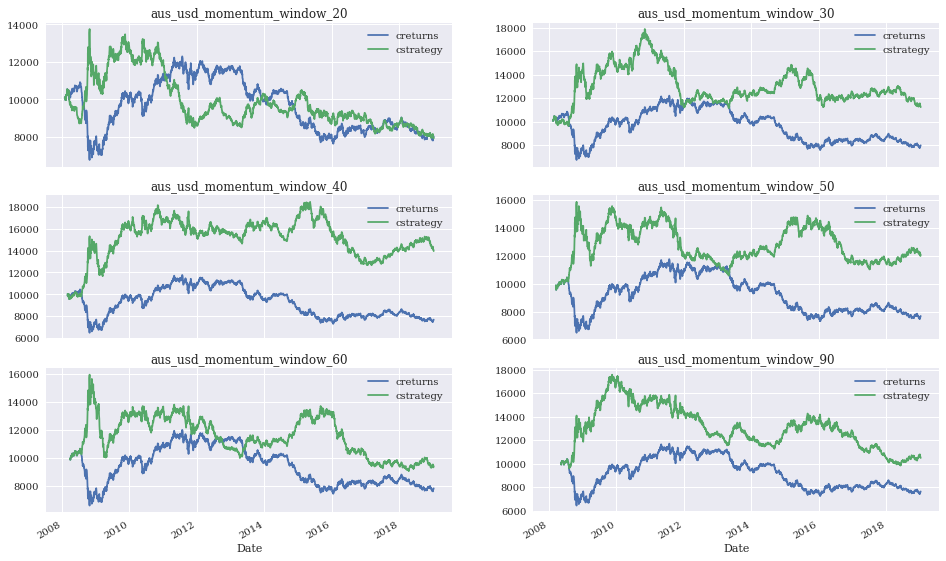

In [16]:
fig, ax = plt.subplots(3,2, figsize=(16,10), sharex=True)

for i, period in enumerate([20,30,40,50, 60, 90]):
    aus_usd_mom.run_strategy(momentum=period)
    aus_usd_mom.plot_results(ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title('{}_momentum_window_{}'.format(aus_usd_mom.instrument, period))